## Mục Đích Phân Cụm và Câu Hỏi Nghiên Cứu

**Mục tiêu chính:** Xác định và phân tích các phân khúc sản phẩm trên Amazon dựa trên mối quan hệ giữa các yếu tố: đặc tính/tính năng mô tả của sản phẩm, giá bán và đánh giá từ người dùng. Qua đó, tìm hiểu xem các sản phẩm đang được định vị như thế nào trên thị trường về mặt "giá trị" và "chất lượng".

**Tại sao chọn các thuộc tính này?**

* **`about_product` (Mô tả sản phẩm - Dữ liệu Văn bản):**
    * **Đóng góp:** Cung cấp thông tin chi tiết về các tính năng, lợi ích, công dụng, và đặc điểm kỹ thuật của sản phẩm. Đây là yếu tố then chốt để hiểu được "giá trị nội tại" hoặc "chất lượng được quảng bá" của sản phẩm.
    * **Vai trò trong phân cụm:** Giúp nhóm các sản phẩm có bộ tính năng tương tự hoặc hướng đến cùng một nhu cầu sử dụng.

* **`discounted_price` / `actual_price` (Giá sản phẩm - Dữ liệu Số):**
    * **Đóng góp:** Phản ánh chi phí mà người tiêu dùng phải bỏ ra để sở hữu sản phẩm.
    * **Vai trò trong phân cụm:** Là một trục quan trọng để so sánh "giá trị nhận được" so với "chi phí bỏ ra".

* **`rating` (Đánh giá trung bình - Dữ liệu Số):**
    * **Đóng góp:** Thể hiện mức độ hài lòng của khách hàng đã sử dụng sản phẩm, một thước đo quan trọng về "chất lượng cảm nhận" hoặc "chất lượng thực tế" sau khi trải nghiệm.
    * **Vai trò trong phân cụm:** Giúp xác định mức độ chấp nhận và yêu thích của thị trường đối với sản phẩm.

**Các câu hỏi mà việc phân cụm với các thuộc tính này nhằm trả lời:**

1.  **Phân khúc sản phẩm theo giá trị và chất lượng:**
    * Có thể xác định được các nhóm sản phẩm nào mang lại **"giá trị tốt nhất"** (ví dụ: nhiều tính năng được mô tả, rating cao nhưng giá cả phải chăng) không?
    * Có thể phân biệt được nhóm sản phẩm **"cao cấp"** (ví dụ: mô tả nhiều tính năng vượt trội, rating rất cao, và giá cao tương xứng) với nhóm sản phẩm **"cơ bản/giá rẻ"** (ví dụ: mô tả ít tính năng, rating ở mức chấp nhận được, giá thấp) không?

2.  **Phát hiện các trường hợp đặc biệt về định giá và cảm nhận chất lượng:**
    * Có nhóm sản phẩm nào dường như được **"định giá quá cao"** (ví dụ: mô tả nhiều tính năng nhưng rating thực tế thấp so với mức giá) không?
    * Có thể tìm ra những **"món hời tiềm ẩn"** (ví dụ: rating tốt, giá thấp, nhưng có thể phần mô tả chưa làm nổi bật hết các tính năng giá trị) không?

3.  **Hiểu cấu trúc thị trường:**
    * Các cụm sản phẩm hình thành có tương quan như thế nào giữa ba yếu tố: tính năng mô tả, giá cả, và đánh giá của người dùng? (Ví dụ: Một cụm có thể là "các sản phẩm điện tử với mô tả nhiều tính năng, giá cao và rating rất tốt", trong khi một cụm khác là "phụ kiện giá rẻ, mô tả đơn giản, rating ở mức khá").

Bằng cách phân cụm dựa trên sự kết hợp của ba thuộc tính này, chúng ta kỳ vọng sẽ khám phá ra những phân khúc sản phẩm có ý nghĩa, từ đó cung cấp cái nhìn sâu sắc hơn về chiến lược sản phẩm và định vị giá trên thị trường.

In [1562]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [1563]:
df = pd.read_csv("data/amazon.csv")

# 1. MÔ TẢ TẬP DỮ LIỆU 

### 📦 Thông tin về tập Amazon Sales Dataset
#### 🛍️ Thông tin về sản phẩm

| Trường              | Mô tả                                                                 |
|---------------------|----------------------------------------------------------------------|
| `product_id`        | Mã định danh duy nhất của sản phẩm.                                  |
| `product_name`      | Tên sản phẩm.                                                        |
| `category`          | Danh mục sản phẩm.                                                   |
| `discounted_price`  | Giá sau khi giảm (hiển thị với khách hàng).                          |
| `actual_price`      | Giá gốc của sản phẩm trước khi giảm giá.                             |
| `discount_percentage` | Phần trăm giảm giá được tính dựa trên `actual_price`.              |
| `rating`            | Điểm đánh giá trung bình từ người dùng (thang điểm 5).               |
| `rating_count`      | Số lượng người đã đánh giá sản phẩm.                                 |
| `about_product`     | Mô tả ngắn hoặc thông tin kỹ thuật về sản phẩm.                      |
| `img_link`          | Link hình ảnh đại diện của sản phẩm.                                 |
| `product_link`      | Link tới trang chính thức của sản phẩm trên website (Amazon hoặc khác). |

#### 🧑 Thông tin đánh giá từ người dùng

| Trường           | Mô tả                                                                 |
|------------------|----------------------------------------------------------------------|
| `user_id`        | Mã định danh của người dùng đã đánh giá sản phẩm.                    |
| `user_name`      | Tên người dùng đã viết đánh giá. Có thể là nickname hoặc tên thật.   |
| `review_id`      | Mã định danh của đánh giá, dùng để phân biệt từng bài review.        |
| `review_title`   | Tiêu đề ngắn gọn của đánh giá, thể hiện ý chính.                     |
| `review_content` | Nội dung chi tiết của bài đánh giá từ người dùng.                    |

# 2. ĐÁNH GIÁ TẬP DỮ LIỆU 

In [1564]:
print("Năm dòng đầu tiên của DataFrame thô:")
df.head()

Năm dòng đầu tiên của DataFrame thô:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [1565]:
print(f"\nKích thước của DataFrame thô: {df.shape[0]} dòng, {df.shape[1]} cột")


Kích thước của DataFrame thô: 1465 dòng, 16 cột


In [1566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Ta thấy dữ liệu gồm có 1465 dòng với 16 cột dữ liệu dưới dạng object.

Các cột discounted_price, actual_price, discount_percentage, rating, rating_count cần chuyển về  dạng số:
| **Cột**              | **Kiểu mới** | **Ghi chú**                                                            |
|----------------------|--------------|------------------------------------------------------------------------|
| `discounted_price`   | `float`      | Cần loại bỏ ký tự `₹`, dấu phẩy nếu có trước khi chuyển đổi kiểu      |
| `actual_price`       | `float`      | Cần loại bỏ ký tự `₹`, dấu phẩy nếu có trước khi chuyển đổi kiểu      |
| `rating`             | `float`      | Đã ở dạng số thập phân, chỉ cần ép kiểu nếu cần                        |
| `discount_percentage`| `float`        | Cần loại bỏ dấu `%` trước khi ép kiểu                                 |
| `rating_count`       | `int`        | Loại bỏ dấu phẩy hàng nghìn (`,`) trước khi ép kiểu                   |

Các cột product_name, category, about_product, review_title, review_content cần xử lý dạng văn bản, rút gọn nội dung, tên sản phẩm/ danh mục: 


| **Cột**             | **Cách xử lý**                                                                                                                                                                  |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `product_name`      | Rút gọn tên sản phẩm, loại bỏ các ký tự đặc biệt                                                                                 |
| `category`          | Đây là chuỗi phân cấp danh mục, ví dụ: `Computers&Accessories\|Accessories&Peripherals\|...\|USBCables`. Có thể xử lý theo các cách:                                          |
|                     | - Trích xuất danh mục **cụ thể nhất** (ví dụ: `USBCables`)                                                                                                                      |
|                     | - Kết hợp danh mục **chính và cuối cùng** (ví dụ: `Computers&Accessories - USBCables`)                                                                                          |
|                     | - Hoặc tách thành **các cột riêng biệt** theo từng cấp phân loại (ví dụ: `cat_lvl_1`, `cat_lvl_2`, ...)                                                                        |
| `about_product`     | Rút gọn nội dung mô tả hoặc áp dụng các kỹ thuật xử lý ngôn ngữ tự nhiên (NLP): loại bỏ từ dừng, chuẩn hoá văn bản, tóm tắt nội dung.                                          |
| `review_title`      | Làm sạch dấu câu, loại bỏ trùng lặp, chuẩn hoá chữ thường/hoa.                                  |
| `review_content`    | Tương tự như `review_title`: làm sạch, chuẩn hoá, có thể dùng `tóm tắt`, `TF-IDF`, `Word2Vec` |

In [1567]:
print("\nGiá trị null ở các cột:")
df.isnull().sum()


Giá trị null ở các cột:


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [1568]:
# Phần trăm giá trị null ở các cột
print("\nPhần trăm giá trị null ở các cột:")
print(df.isnull().mean().round(4) * 100)


Phần trăm giá trị null ở các cột:
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
rating_count           0.14
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64


Có cột rating_count có tỷ lệ % Null là 0.14%, có thể xóa/bỏ đi được. 


# 3. TIỀN XỬ LÝ DỮ LIỆU 

## 3.1. Tiền xử lý dữ liệu số 

In [1569]:
# Tạo một bản sao để thao tác an toàn
df_processed = df.copy()

# Loại bỏ các ký tự không phải số khỏi các cột giá
price_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
for col in price_columns:
    df_processed[col] = df_processed[col].str.replace('₹', '', regex=False)
    df_processed[col] = df_processed[col].str.replace(',', '', regex=False)
    df_processed[col] = df_processed[col].str.replace('%', '', regex=False)

print("Đã loại bỏ ký tự khỏi các cột giá.")

Đã loại bỏ ký tự khỏi các cột giá.


In [1570]:
df_processed.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [1571]:
# Chuyển đổi các cột sang dạng số
numeric_columns = ['discounted_price', 'actual_price', 'rating', 'discount_percentage', 'rating_count']
for col in numeric_columns:
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
df_processed['discount_percentage'] = df_processed['discount_percentage']/100
df_processed['rating_count'] = df_processed['rating_count'].astype('Int64')
print("Đã chuyển các cột sang kiểu dữ liệu số.")

Đã chuyển các cột sang kiểu dữ liệu số.


In [1572]:
# Tìm dữ liệu bị lỗi trong cột 'rating'
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

Tra cứu điểm đánh giá của sản phẩm này trên Amazon bằng cách tìm kiếm product_id được cung cấp trên trang chính thức của họ (amazon.in).

Điểm đánh giá là 3.9. Vì vậy, đánh giá sản phẩm này là 3.9.

In [1573]:
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [1574]:
# In thông tin tổng quan của DataFrame để kiểm tra
print("Thông tin DataFrame sau khi chuyển đổi kiểu dữ liệu:")
df_processed.info()
print(df_processed.head(10))

Thông tin DataFrame sau khi chuyển đổi kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null 

## 3.2. Tiền xử lý dữ liệu văn bản 

In [1575]:
import nltk

# Tải các gói cần thiết cho việc xử lý ngôn ngữ
nltk.download('punkt')      # Dùng cho Tokenization
nltk.download('stopwords')  # Chứa danh sách từ dừng
nltk.download('wordnet')    # Dùng cho Lemmatization
nltk.download('punkt_tab')

print("Đã tải xong các tài nguyên NLTK.")

Đã tải xong các tài nguyên NLTK.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Xử lý tên sản phẩm - rút gọn và loại bỏ ký tự đặc biệt

In [1576]:
def clean_product_name(name):
    if not isinstance(name, str):
        return name
    name = name.replace('&', ' and ')
    # Loại bỏ các ký tự đặc biệt
    # Sử dụng biểu thức chính quy (regex) để loại bỏ các ký tự đặc biệt khỏi chuỗi name, giữ lại chỉ chữ cái, số và khoảng trắng.
    cleaned_name = re.sub(r'[^\w\s]', ' ', name)
    # Loại bỏ khoảng trắng thừa
    cleaned_name = re.sub(r'\s+', ' ', cleaned_name).strip()
    # Rút gọn tên sản phẩm nếu quá dài
    return cleaned_name[:50] + '...' if len(cleaned_name) > 50 else cleaned_name
# Áp dụng hàm làm sạch tên sản phẩm
df_processed['product_name'] = df_processed['product_name'].apply(clean_product_name)

#### Xử lý tên danh mục sản phẩm

In [1577]:
# Hàm danh mục chính 
def extract_main_category(category):
    if not isinstance(category, str):
        return category
    categories = category.split('|')
    return categories[0] if categories else ''
# Danh mục cụ thể nhất (cuối cùng)
def extract_specific_category(category):
    if not isinstance(category, str):
        return category
    categories = category.split('|')
    return categories[-1] if categories else ''
# Áp dụng hàm để tạo cột danh mục chính và cụ thể nhất
df_processed['main_category'] = df_processed['category'].apply(extract_main_category)
df_processed['specific_category'] = df_processed['category'].apply(extract_specific_category)
# Làm sach cột danh mục
df_processed['main_category'] = df_processed['main_category'].apply(clean_product_name)
df_processed['specific_category'] = df_processed['specific_category'].apply(clean_product_name)

In [1578]:
df_processed.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,specific_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers and Accessories,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W 3A Fast Charging 1 5m ...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers and Accessories,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable and Data Sync...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers and Accessories,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type C and Micro USB...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers and Accessories,USBCables
4,B08CF3B7N1,Portronics Konnect L 1 2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers and Accessories,USBCables


#### Xử lý thuộc tính text - rút gọn và loại bỏ ký tự đặc biệt

In [1579]:
# In 20 dòng đầu của các thuộc tính văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    print(f"\n20 dòng đầu của cột {col}:")
    for i, val in enumerate(df_processed[col].head(5)):
        print(f"{i+1}. {val}")




20 dòng đầu của cột about_product:
1. High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.


In [1580]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = text.lower()
    text = re.sub(r'&+', ' and ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'm\s*media\s*amazon\s*com\s*images\S*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Áp dụng cho các cột văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    df_processed[col] = df_processed[col].apply(clean_text)

In [1581]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return text
    # Tokenization
    tokens = word_tokenize(text)
    # Loại bỏ stop word và chỉ giữ lại từ chữ cái
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    # Ghép lại thành chuỗi
    return ' '.join(tokens)

text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    df_processed[col] = df_processed[col].apply(preprocess_text)

In [1582]:
# In 5 dòng đầu của các thuộc tính văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    print(f"\n5 dòng đầu của cột {col}:")
    for i, val in enumerate(df_processed[col].head(5)):
        print(f"{i+1}. {val}")


5 dòng đầu của cột about_product:
1. high compatibility compatible iphone x xsmax xr iphone plus iphone plus iphone plus iphone plus iphone se ipad pro ipad air ipad mini ipod ipod touch apple device fast charge data sync charge sync simultaneously rapid speed compatible charging adaptor multi port charging station power bank durability durable nylon braided design premium aluminum housing toughened nylon fiber wound tightly around cord lending superior durability adding bit flexibility high security level designed fully protect device damaging excessive current copper core thick multilayer shielding anti interference protective circuit equipment warranty month warranty friendly customer service ensures long time enjoyment purchase meet question problem please hesitate contact u
2. compatible type c enabled device android smartphone mi samsung oppo vivo realme oneplus etc tablet laptop macbook chromebook etc support quick charging unbreakable made special braided outer rugged interior

## 3.3. Làm sạch dữ liệu 

In [1583]:
# Tính giá trị trung vị của cột 'rating'
median_rating = df_processed['rating'].median()

# Dùng giá trị trung vị để lấp vào ô bị thiếu (NaN)
df_processed['rating'].fillna(median_rating, inplace=True)

print(f"Đã lấp đầy giá trị thiếu bằng trung vị: {median_rating}")
print("\nKiểm tra lại thông tin DataFrame:")
df_processed.info()

Đã lấp đầy giá trị thiếu bằng trung vị: 4.1

Kiểm tra lại thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link 

C:\Users\PC\AppData\Local\Temp\ipykernel_15996\486876630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['rating'].fillna(median_rating, inplace=True)


In [1584]:
# Xử lý dữ liệu trùng lặp
df_processed.duplicated().sum()

0

Không có dữ liệu trùng lặp 

# 4. KHÁM PHÁ VÀ PHÂN TÍCH DỮ LIỆU (EDA)

## 4.1. Thống kê, phân phối dữ liệu 

In [1585]:
df_processed.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.0
mean,3125.310874,5444.990635,0.476915,4.096587,18295.541353
std,6944.304394,10874.826864,0.216359,0.291574,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.0
25%,325.000000,800.000000,0.320000,4.000000,1186.0
50%,799.000000,1650.000000,0.500000,4.100000,5179.0
75%,1999.000000,4295.000000,0.630000,4.300000,17336.5
max,77990.000000,139900.000000,0.940000,5.000000,426973.0


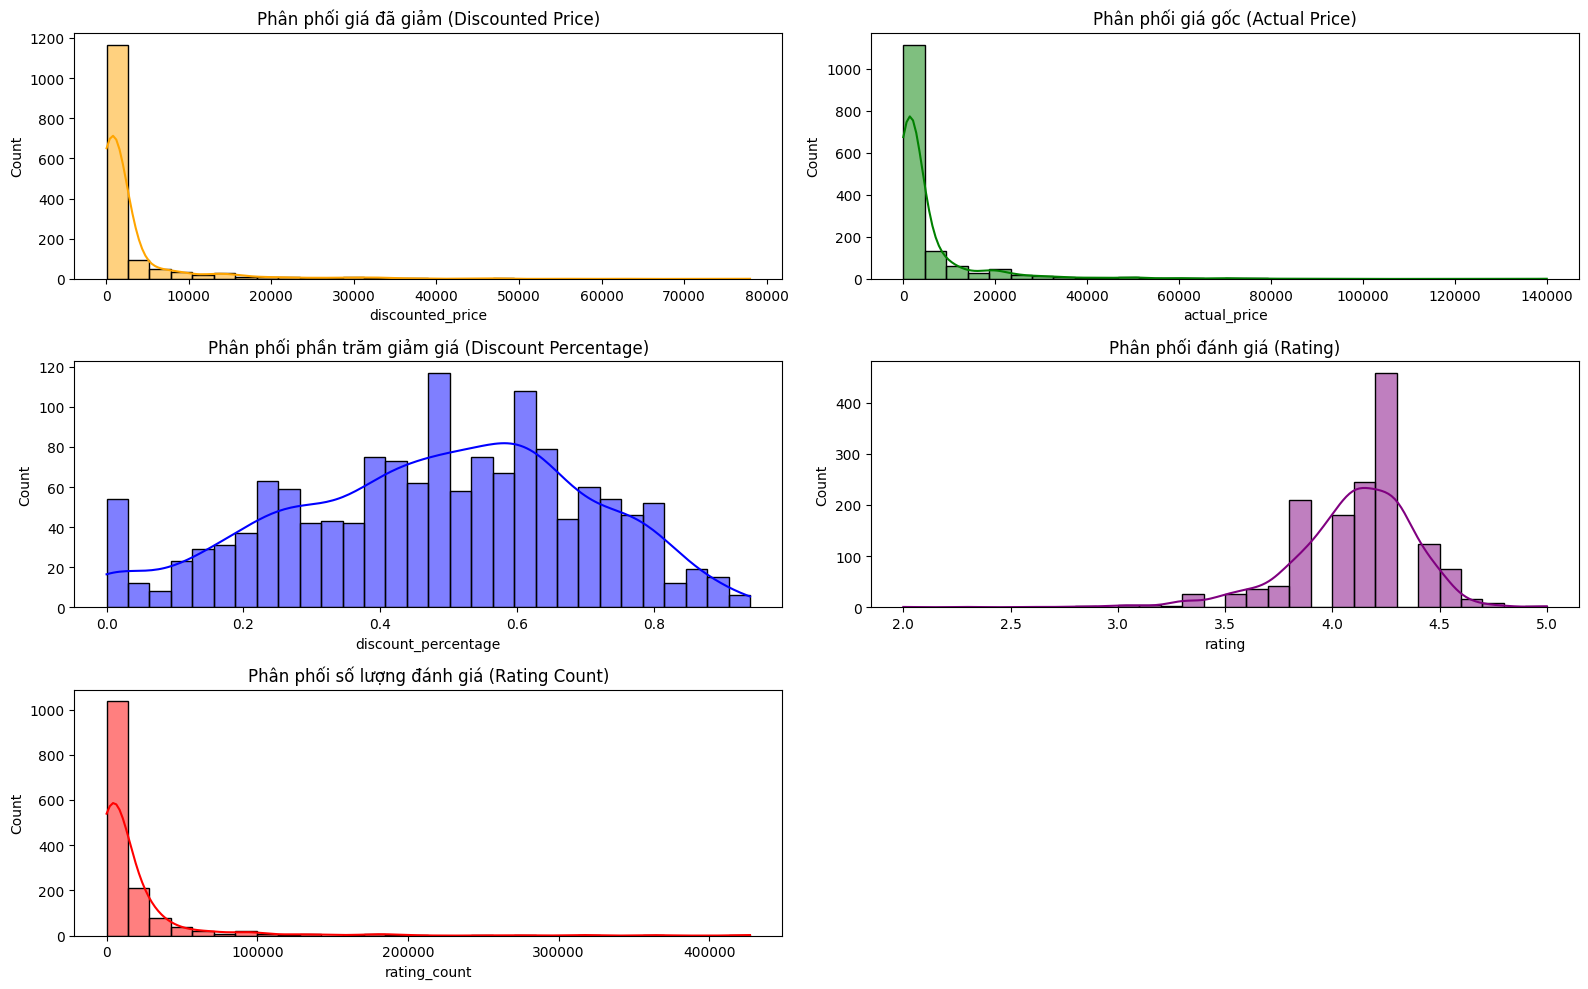

In [1586]:
# Trực quan hóa phân phối của các cột số 
plt.figure(figsize=(16,10))
plt.subplot(3, 2, 1)
sns.histplot(df_processed['discounted_price'], bins=30, kde=True, color='orange')
plt.title('Phân phối giá đã giảm (Discounted Price)')
plt.subplot(3, 2, 2)
sns.histplot(df_processed['actual_price'], bins=30, kde=True, color='green')
plt.title('Phân phối giá gốc (Actual Price)')
plt.subplot(3,2,3)
sns.histplot(df_processed['discount_percentage'], bins=30, kde=True, color='blue')
plt.title('Phân phối phần trăm giảm giá (Discount Percentage)')
plt.subplot(3, 2, 4)
sns.histplot(df_processed['rating'], bins=30, kde=True, color='purple')
plt.title('Phân phối đánh giá (Rating)')
plt.subplot(3, 2, 5)
sns.histplot(df_processed['rating_count'], bins=30, kde=True, color='red')
plt.title('Phân phối số lượng đánh giá (Rating Count)')
plt.tight_layout()
plt.show()


**Các thuộc tính số đều có phân phối không chuẩn:**
- Discounted_price và actual_price có phân phối lệch phải: cho thấy giá gốc và giá đã giảm nằm ở mức thấp, nhiều nhất ở khoảng dưới 2000 Rupee (~$23/600.000VND).
- Phần trăm giảm giá (Discount percentage) phân phối trải rộng, tập trung nhiều nhất ở khoảng 40-60% cho một sản phẩm.
- Rating lại có phân phối lệch trái: cho thấy điểm đánh giá cho các sản phẩm khá cao, chủ yếu ở mức 3.5 - 4.5. 
- Số đánh giá cho mỗi sản phẩm có phân phối lệch phải: khoảng dưới 100.000 đánh giá cho một sản phẩm, một số ít có số lượng đánh giá cao.  


In [1587]:
df_processed.describe(include='object')

,product_id,product_name,category,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,specific_category
count,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1290,211,1271,1194,1194,1194,1194,1194,1412,1465,9,207
top,B07JW9H4J1,Ambrane Unbreakable 60W 3A Fast Charging 1 5m ...,Computers&Accessories|Accessories&Peripherals|...,charge sync function cable come charging data ...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...",worked iphone work xr good one dull physical l...,worked iphone work iphone xr like still use wo...,https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Electronics,USBCables
freq,3,7,233,6,10,10,10,10,10,3,1,526,233


- Danh mục sản phẩm chính xuất hiện nhiều nhất là Electronics và loại USBCables. 
- Các danh mục sản phẩm duy nhất: 9
- Các danh mục cụ thể nhất duy nhất: 207
- Có 1290 loại sản phẩm khác nhau 

## 4.2. Grouping and Aggregation

### Đánh giá trung bình của các danh mục sản phẩm 

In [1588]:
# Nhóm theo danh mục chính và tính trung bình của cột 'rating'
grouped_df = df_processed.groupby('main_category')['rating'].mean()
print("\nTrung bình đánh giá theo danh mục chính:")
print(grouped_df.sort_values(ascending=False).head(10))



Trung bình đánh giá theo danh mục chính:
main_category
OfficeProducts               4.309677
Toys and Games               4.300000
HomeImprovement              4.250000
Computers and Accessories    4.154967
Electronics                  4.081749
Home and Kitchen             4.040848
Health and PersonalCare      4.000000
MusicalInstruments           3.900000
Car and Motorbike            3.800000
Name: rating, dtype: float64


- Các đánh giá cao nhất thuộc về danh mục sản phẩm văn phòng phẩm, đồ chơi và games.
- Đồ điện tử, danh mục sản phẩm cho nhà bếp, sức khỏe đánh giá nằm ở mức trung bình.
- Nhạc cụ và các loại xe mua qua sàn thương mại Amazon lại có đánh giá trung bình thấp. 

### Top 10 sản phẩm có số lượng đánh giá nhiều nhất ở các danh mục sản phẩm 

In [1589]:
product_gr_cate_rating_count = df_processed.groupby(['main_category', 'product_name'])['rating_count'].sum().reset_index()
product_gr_cate_rating_count = product_gr_cate_rating_count.sort_values(by='rating_count', ascending=False)
print("\nSố lượng đánh giá theo danh mục chính và tên sản phẩm:")
product_gr_cate_rating_count.head(10)


Số lượng đánh giá theo danh mục chính và tên sản phẩm:


,main_category,product_name,rating_count
403,Electronics,AmazonBasics Flexible Premium HDMI Cable Black...,853945
768,Electronics,boAt Bassheads 100 in Ear Wired Earphones with...,727426
499,Electronics,JBL C100SI Wired In Ear Headphones with Mic JB...,577766
395,Electronics,Amazon Basics High Speed HDMI Cable 6 Feet 2 P...,426973
396,Electronics,Amazon Basics High Speed HDMI Cable 6 Feet Sup...,426973
342,Computers and Accessories,boAt Deuce USB 300 2 in 1 Type C and Micro USB...,377454
765,Electronics,boAt BassHeads 100 in Ear Wired Headphones wit...,363711
772,Electronics,boAt Bassheads 242 in Ear Wired Earphones with...,323356
621,Electronics,Redmi 9 Activ Carbon Black 4GB RAM 64GB Storag...,313836
623,Electronics,Redmi 9A Sport Coral Green 2GB RAM 32GB Storag...,313836


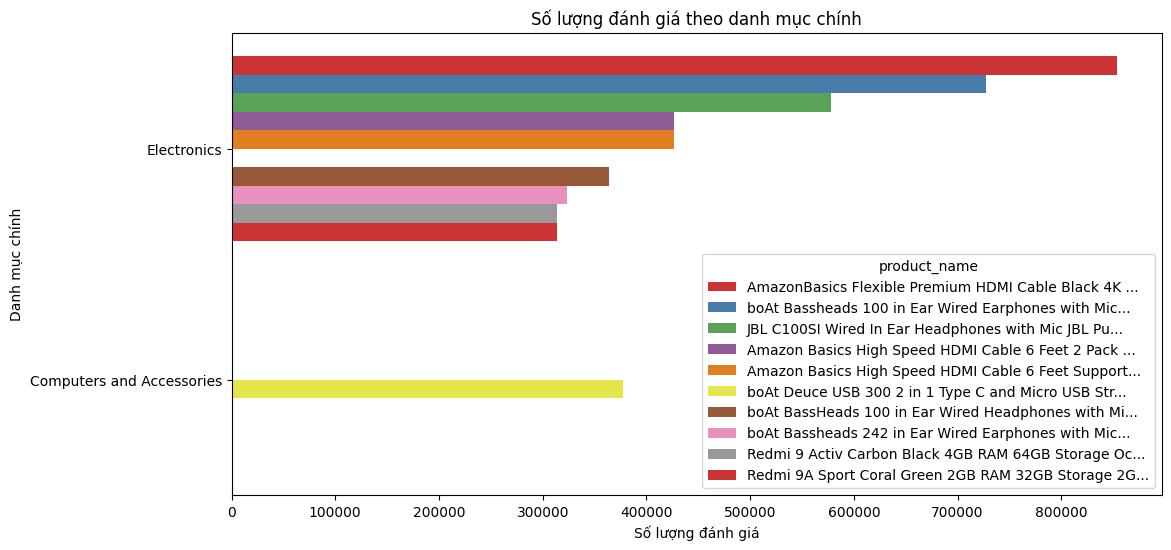

In [1590]:
# Trực quan hóa số lượng đánh giá theo danh mục chính
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='main_category', data=product_gr_cate_rating_count.head(10), palette='Set1', hue='product_name')
plt.title('Số lượng đánh giá theo danh mục chính')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Danh mục chính')
plt.show()

- Danh mục có số lượng sản phẩm được đánh giá nhiều nhất là Electronics, và điểm đánh giá trung bình cho danh mục này nằm ở mức 4.0 (Khá). Đứng đầu là Cáp AmazonBasics. 
- Danh mục có sản phẩm bán chạy nằm trong Top 10 là Computers and Accessories với sản phẩm Deuce USB. Và Computers and Accessories cũng có rating trung bình là 4.15 nằm ở mức khá. <br>
**--> Những sản phẩm có số lượng đánh giá cao nhất trong từng danh mục có thể được coi là các mặt hàng bán chạy tiềm năng, ngay cả khi không có dữ liệu bán hàng trực tiếp.**

# 5. XỬ LÝ OUTLIERS, NHIỄU 

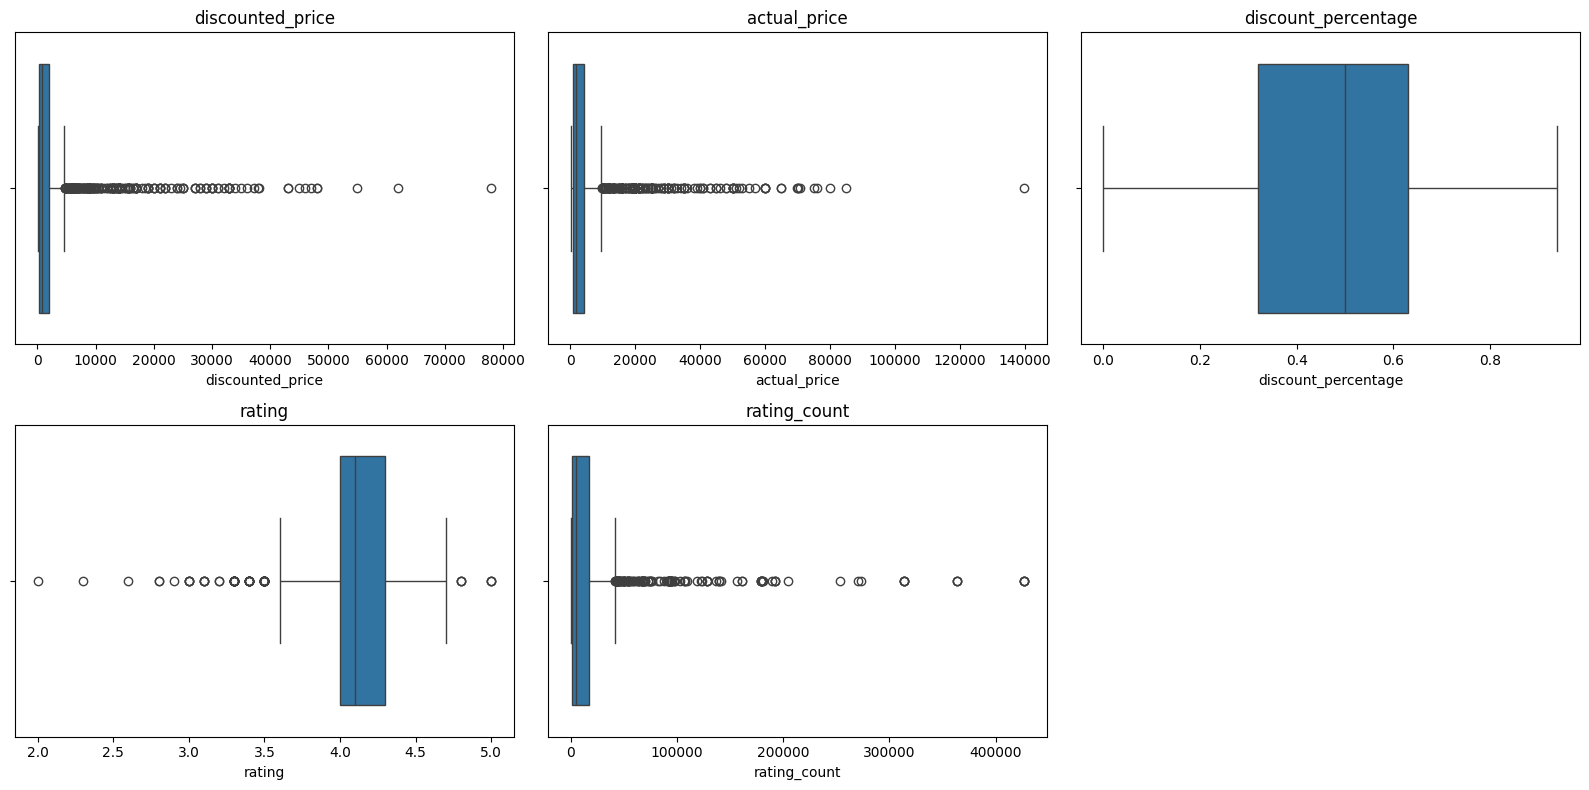

In [1591]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Vẽ boxplot để kiểm tra outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_processed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [1592]:
# Kiểm tra tỷ lệ outliers của từng biến số bằng phương pháp IQR
def compute_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def outlier_ratio_iqr(series):
    lower, upper = compute_iqr_bounds(series)
    outliers = ((series < lower) | (series > upper)).sum()
    ratio = outliers / series.shape[0]
    return outliers, ratio

print("Tỷ lệ outliers theo từng biến số:")
for col in numeric_cols:
    outliers, ratio = outlier_ratio_iqr(df_processed[col])
    print(f"{col}: {outliers} outliers ({ratio:.2%})")

Tỷ lệ outliers theo từng biến số:
discounted_price: 217 outliers (14.81%)
actual_price: 213 outliers (14.54%)
discount_percentage: 0 outliers (0.00%)
rating: 74 outliers (5.05%)
rating_count: 141 outliers (9.62%)


In [1593]:
def remove_outliers(df, column):
    upper = df[column].quantile(0.95)
    return df[(df[column] <= upper)]

for col in ['discounted_price']:
    before = df_processed.shape[0]
    df_processed = remove_outliers(df_processed, col)
    after = df_processed.shape[0]
    print(f" Đã loại bỏ {(before - after)} dòng ngoài khoảng 90% trung tâm ở cột '{col}'.")

 Đã loại bỏ 71 dòng ngoài khoảng 90% trung tâm ở cột 'discounted_price'.


# 6. Chuẩn hóa dữ liệu


#### Chuẩn hóa dữ liệu số

In [1594]:
from sklearn.preprocessing import StandardScaler

num_cols = ['discounted_price', 'actual_price', 'rating']
scaler = StandardScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

print("Đã chuẩn hóa các cột số:", num_cols)
df_processed[num_cols].head()

Đã chuẩn hóa các cột số: ['discounted_price', 'actual_price', 'rating']


,discounted_price,actual_price,rating
0,-0.490149,-0.466290,0.368402
1,-0.559254,-0.610841,-0.307769
2,-0.559254,-0.312103,-0.645855
3,-0.514336,-0.543384,0.368402
4,-0.574803,-0.601204,0.368402


#### Chuẩn hóa văn bản

In [1595]:
#!pip install sentence-transformers

In [1596]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# TF-IDF với 1000 chiều
tfidf = TfidfVectorizer(max_features=1000)
about_embeddings = tfidf.fit_transform(df_processed['about_product'])
print("Đã hoàn thành việc huấn luyện TfidfVectorizer.")

total_unique_words = len(tfidf.vocabulary_)

print(f"Tổng số từ độc lập trong tập dữ liệu của bạn là: {total_unique_words}")


Đã hoàn thành việc huấn luyện TfidfVectorizer.
Tổng số từ độc lập trong tập dữ liệu của bạn là: 1000


In [1597]:
svd = TruncatedSVD(n_components=300, random_state=42) 
about_embeddings_reduced = svd.fit_transform(about_embeddings)
print("Variance explained:", svd.explained_variance_ratio_.sum())


Variance explained: 0.8380305223886578


#### Hợp 2 thuộc tính lại

In [1598]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Lấy 2 cột số đã chuẩn hóa
X_num = df_processed[['discounted_price', 'rating']].values

# Nhân trọng số cho đặc trưng số 
#Chọn weight ≈ sqrt(302/3)
weight = 10
X_num_weighted = X_num * weight

# Ghép với embedding
X = np.hstack([X_num_weighted, about_embeddings_reduced])

print("Shape đặc trưng đầu vào:", X.shape)

Shape đặc trưng đầu vào: (1394, 302)


# Phân cụm theo Kmeans

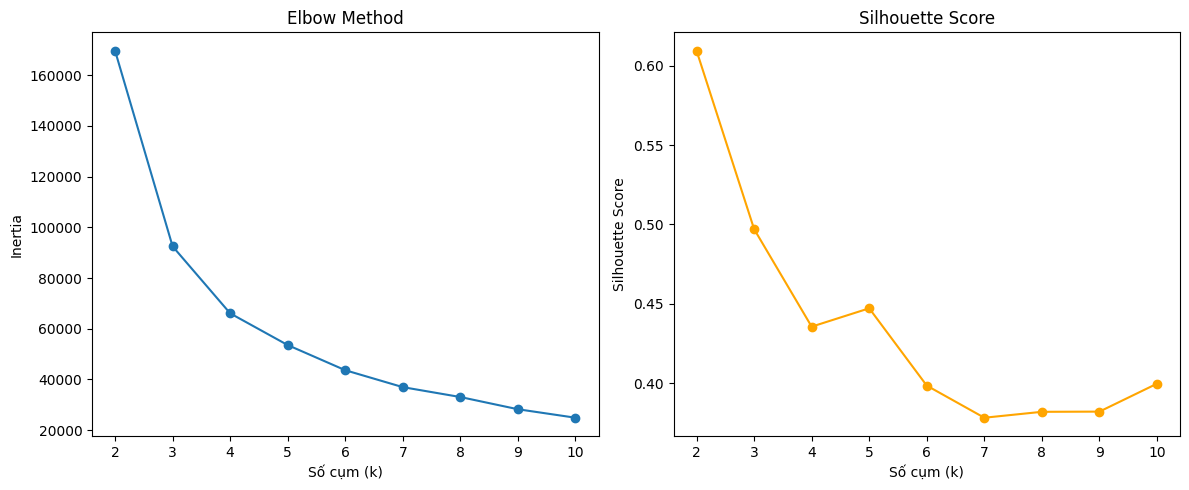

In [1599]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [1600]:
from sklearn.cluster import KMeans

# Phân cụm KMeans với k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Thêm nhãn cụm vào DataFrame
df_processed['kmeans_cluster'] = labels

# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm:")
print(pd.Series(labels).value_counts())

Số lượng điểm trong mỗi cụm:
1    931
0    336
2    127
Name: count, dtype: int64


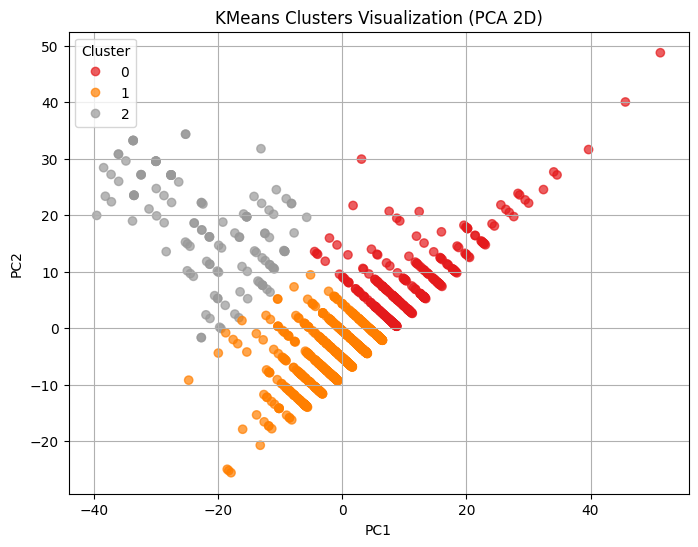

In [1601]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2 thành phần chính với PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Vẽ scatter plot, mỗi cụm một màu
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters Visualization (PCA 2D)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

In [1602]:
# Đánh giá Silhouette Score
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

# Thống kê đặc trưng từng cụm
print(df_processed.groupby('kmeans_cluster')[['discounted_price', 'rating']].mean())
print(df_processed['kmeans_cluster'].value_counts())

Silhouette Score: 0.497
Davies-Bouldin Index: 0.689
                discounted_price    rating
kmeans_cluster                            
0                      -0.252936 -1.330075
1                      -0.289211  0.443209
2                       2.789305  0.269904
kmeans_cluster
1    931
0    336
2    127
Name: count, dtype: int64


Gán nhãn cho các cụm KMeans:

Cụm 0: "Sản phẩm giá thấp, chất lượng kém" (336 sản phẩm - 24%).
Đặc điểm: Giá thấp hơn trung bình, đánh giá rất thấp.
Ý nghĩa: Sản phẩm giá rẻ nhưng chất lượng không được đánh giá cao.
Đáp ứng câu hỏi: Phát hiện sản phẩm được "định giá không hợp lý" - giá có thể phù hợp nhưng chất lượng kém.

Cụm 1: "Sản phẩm giá trị tốt" (931 sản phẩm - 67%).
Đặc điểm: Giá thấp hơn trung bình, đánh giá cao hơn trung bình.
Ý nghĩa: Đây là phân khúc "value for money" - giá cả phải chăng nhưng chất lượng tốt.
Đáp ứng câu hỏi: Xác định được nhóm sản phẩm mang lại "giá trị tốt nhất" và có thể là "món hời tiềm ẩn".

Cụm 2: "Sản phẩm cao cấp" (127 sản phẩm - 9%).
Đặc điểm: Giá cao hơn trung bình rất nhiều, đánh giá cao hơn trung bình.
Ý nghĩa: Sản phẩm cao cấp, giá cao nhưng chất lượng được đánh giá tốt.
Đáp ứng câu hỏi: Phân biệt được nhóm sản phẩm "cao cấp" với các phân khúc khác.

# Phân cụm phân cấp 

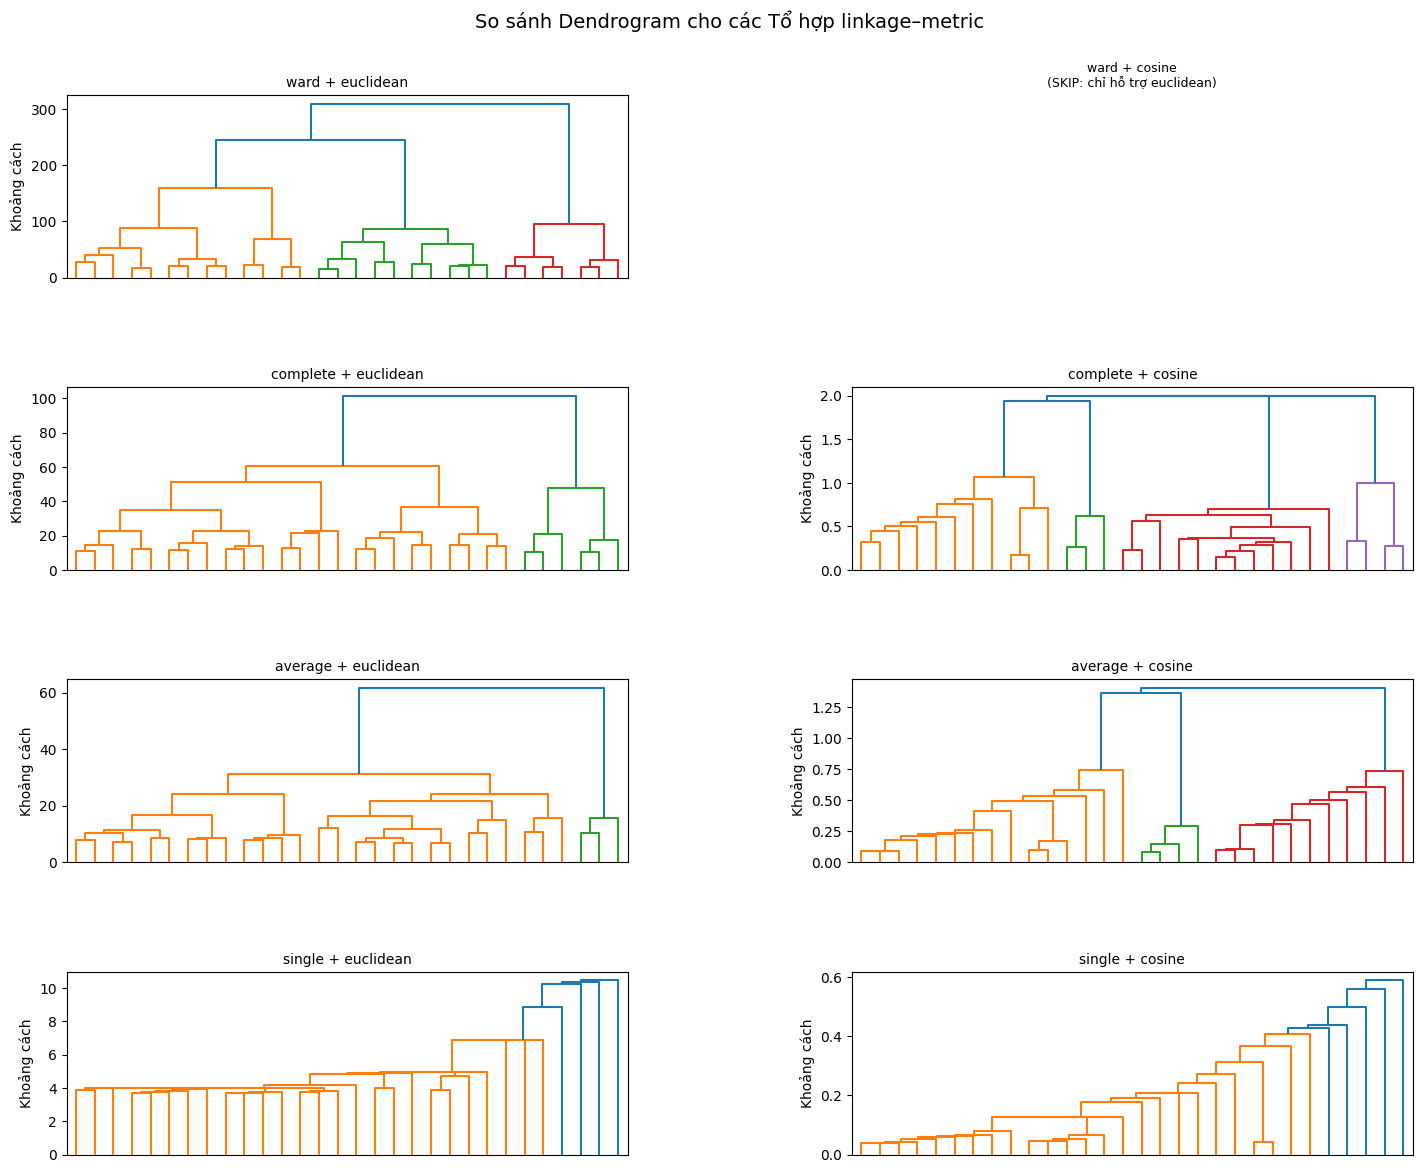

In [1603]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Lấy mẫu ngẫu nhiên (nếu dữ liệu quá lớn)
sample_size = min(500, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]

linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'cosine']

# Tạo lưới 4 hàng x 3 cột
fig, axes = plt.subplots(nrows=len(linkage_methods), 
                         ncols=len(affinity_metrics), 
                         figsize=(15, 12), 
                         sharex=False, sharey=False)
fig.tight_layout(pad=4.0)

for i, method in enumerate(linkage_methods):
    for j, metric in enumerate(affinity_metrics):
        ax = axes[i, j]
        
        # Nếu method='ward' buộc phải metric='euclidean'
        if method == 'ward' and metric != 'euclidean':
            ax.axis('off')
            ax.set_title(f"{method} + {metric}\n(SKIP: chỉ hỗ trợ euclidean)", fontsize=9)
            continue
        
        # Tính linkage
        try:
            Z = linkage(X_sample, method=method, metric=metric)
        except Exception as e:
            ax.axis('off')
            ax.set_title(f"{method} + {metric}\n(Lỗi)", fontsize=9)
            continue
        
        # Vẽ dendrogram rút gọn (truncate_mode='lastp')
        dendrogram(
            Z,
            ax=ax,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False,
            truncate_mode='lastp',
            p=30
        )
        
        ax.set_title(f"{method} + {metric}", fontsize=10)
        ax.set_ylabel("Khoảng cách")
        ax.set_xticks([])

# Chỉnh lại khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.suptitle("So sánh Dendrogram cho các Tổ hợp linkage–metric", y=1.02, fontsize=14)
plt.show()


In [1604]:
best_method = 'ward'
best_affinity = 'euclidean'

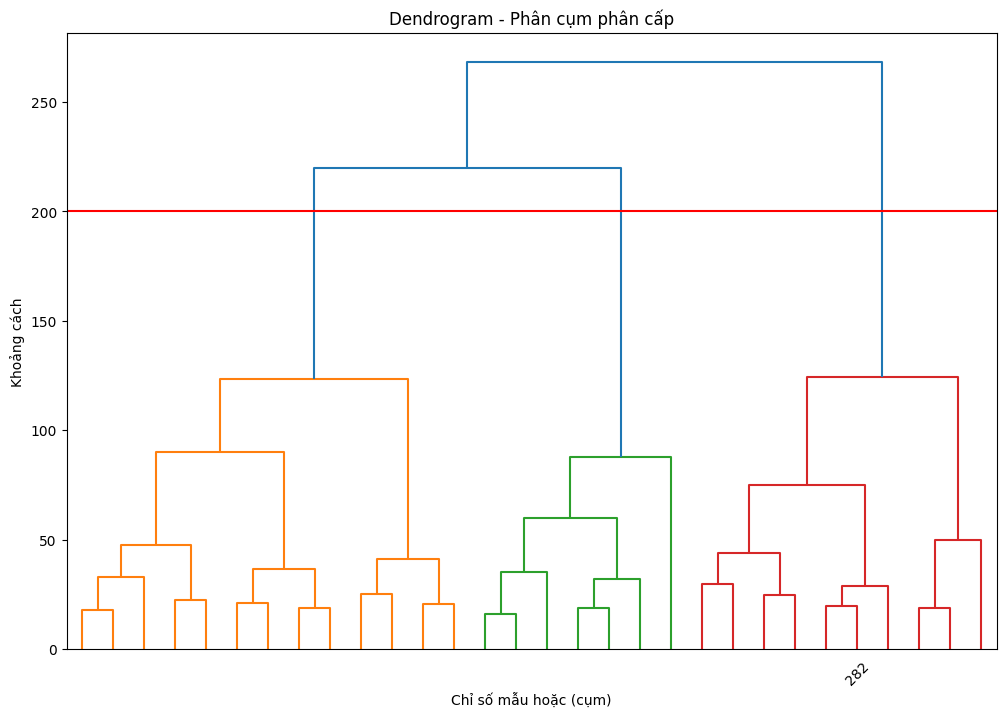

In [1605]:
# 1. Vẽ dendrogram để xác định số cụm tối ưu
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Lấy mẫu ngẫu nhiên để vẽ dendrogram (do kích thước dữ liệu lớn)
sample_size = min(500, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]

# Tính toán ma trận liên kết
plt.figure(figsize=(12, 8))
linked = linkage(X_sample, method='ward', metric = 'euclidean')

# Vẽ dendrogram
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='lastp',
           p=30)  # Hiển thị 30 nút cuối cùng
plt.title('Dendrogram - Phân cụm phân cấp')
plt.xlabel('Chỉ số mẫu hoặc (cụm)')
plt.ylabel('Khoảng cách')
plt.axhline(y = 200, color = 'red')


plt.show()

In [1606]:
# Phân cụm phân cấp với phương pháp tốt nhất
agglo = AgglomerativeClustering(n_clusters=3, metric = best_affinity, linkage = best_method)
agglo_labels = agglo.fit_predict(X)
df_processed['agglo_cluster'] = agglo_labels

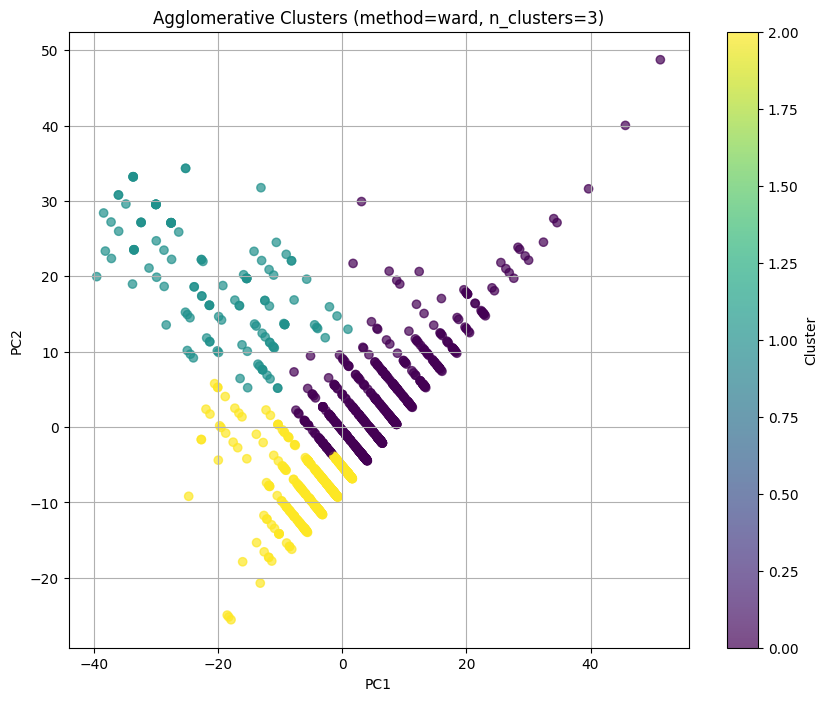

In [1607]:
# 5. Trực quan hóa kết quả phân cụm phân cấp
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2 thành phần chính với PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Trực quan hóa kết quả phân cụm phân cấp
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=agglo_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Agglomerative Clusters (method={best_method}, n_clusters=3)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [1608]:
# Đánh giá kết quả phân cụm
sil_score_agglo = silhouette_score(X, agglo_labels)
db_score_agglo = davies_bouldin_score(X, agglo_labels)
print(f"Silhouette Score (Agglomerative - {best_method}): {sil_score_agglo:.3f}")
print(f"Davies-Bouldin Index (Agglomerative - {best_method}): {db_score_agglo:.3f}")

# Thống kê đặc trưng từng cụm
print("\nThống kê đặc trưng từng cụm:")
print(df_processed.groupby('agglo_cluster')[['discounted_price', 'rating']].mean())
print(df_processed['agglo_cluster'].value_counts())

Silhouette Score (Agglomerative - ward): 0.401
Davies-Bouldin Index (Agglomerative - ward): 0.761

Thống kê đặc trưng từng cụm:
               discounted_price    rating
agglo_cluster                            
0                     -0.263370 -0.633486
1                      2.786556  0.114837
2                     -0.284146  0.852016
agglo_cluster
0    738
2    532
1    124
Name: count, dtype: int64


Diễn giải và gán nhãn cho các cụm:

Cụm 0: "Sản phẩm đại trà, chất lượng trung bình-thấp" (738 sản phẩm - 53%)
Đặc điểm: Giá thấp hơn trung bình, đánh giá thấp hơn trung bình
Khác biệt với KMeans: Đây là cụm lớn nhất, nhưng rating không quá thấp như cụm 0 của KMeans
Ý nghĩa: Sản phẩm phổ thông, giá rẻ, chất lượng tương đối phù hợp với giá tiền

Cụm 1: "Sản phẩm cao cấp" (124 sản phẩm - 9%)
Đặc điểm: Giá cao hơn trung bình rất nhiều (~2.8 độ lệch chuẩn), đánh giá chỉ nhỉnh hơn trung bình một chút
Khác biệt với KMeans: Gần như giống hệt cụm 2 của KMeans
Ý nghĩa: Sản phẩm cao cấp nhưng có vẻ bị định giá cao so với chất lượng thực tế cảm nhận

Cụm 2: "Sản phẩm giá trị tốt nhất" (532 sản phẩm - 38%)
Đặc điểm: Giá thấp hơn trung bình, nhưng rating cao hơn trung bình rất nhiều
Khác biệt với KMeans: Rating cao hơn hẳn (0.85 so với 0.44)
Ý nghĩa: Đây là những sản phẩm "món hời" thực sự - giá thấp nhưng chất lượng được đánh giá rất cao